In [1]:
import numpy as np
import pandas as pd
import time  #to measure time
import random
import seaborn as sns  #for plots

In [2]:
# подключаем гугл диск на котором данные
from google.colab import drive
drive.mount ('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [4]:
!ls /content/gdrive/'My Drive'/raifhack/data

test.csv  test_submission.csv  train.csv


In [5]:
PATH_TO_DATA = "../content/gdrive/My Drive/raifhack/data"

In [6]:
train_df = pd.read_csv(PATH_TO_DATA+'/train.csv')
train_df.tail(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
279790,Кемерово,1.0,COL_280529,55.360680,86.081460,5,57,100,134,0,0,0,0,1,16,32,41,0.844577,Кемерово,558662.0,0.341931,0,10,12,20,1,3,5,7,1,4,6,7,1,3,3,1,7,9,0,0,1,1,4,7,0,2,9,12,1,23,32,48,200.109079,2.073608,0,0,0,0.385545,3,14,18,38755.038322,94,24,1649.0,429.0,4.691489,4.125000,1957.425532,1954.625000,Кемеровская область,89.201305,S17667,2020-08-23,110,1
279791,Киров,1.0,COL_280637,58.592915,49.677439,1,23,64,113,0,0,0,0,0,1,11,25,1.317512,Киров,496986.0,0.126115,0,6,18,48,0,0,0,1,0,6,9,12,3,4,5,0,1,2,1,1,3,1,1,4,0,0,4,7,1,10,37,61,306.460323,1.998461,0,0,0,0.148057,4,12,19,41335.014762,249,79,2735.0,766.0,5.069124,4.776119,1972.599078,1971.794118,Кировская область,172.855871,S5611,2020-08-23,110,1


In [7]:
#смотрим размерность данный, 279 ТЫС. СТРОК, 77 СТОЛБЦОВ
train_df.shape

(279792, 77)

In [8]:
#смотрим названия колонок
train_df.columns

Index(['city', 'floor', 'id', 'lat', 'lng', 'osm_amenity_points_in_0.001',
       'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075',
       'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001',
       'osm_building_points_in_0.005', 'osm_building_points_in_0.0075',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075',
       'osm_catering_points_in_0.01', 'osm_city_closest_dist',
       'osm_city_nearest_name', 'osm_city_nearest_population',
       'osm_crossing_closest_dist', 'osm_crossing_points_in_0.001',
       'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075',
       'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001',
       'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075',
       'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001',
       'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075',
       'osm_finance_points_in

In [9]:
import matplotlib.pyplot as plt
import scipy
import math
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score, roc_curve

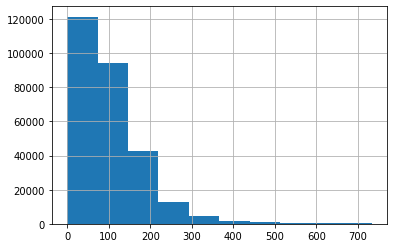

In [14]:
train_df.reform_count_of_houses_1000.hist()

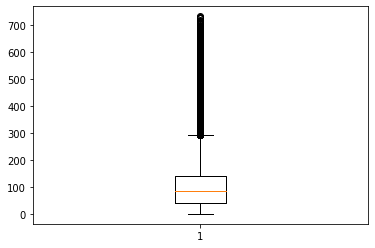

In [17]:
#оценка порядковой статистики и ее представление в виде "ящика с усами"
plt.boxplot(train_df.reform_count_of_houses_1000)
plt.savefig('boxplot_reform_1000.png')

In [18]:
!ls


boxplot_reform_1000.png  gdrive  sample_data


In [22]:
#порядковые статистики мин, макс, медиана
train_df.reform_count_of_houses_1000.min()

0

In [23]:
train_df.reform_count_of_houses_1000.max()

733

In [24]:
train_df.reform_count_of_houses_1000.median()

86.0

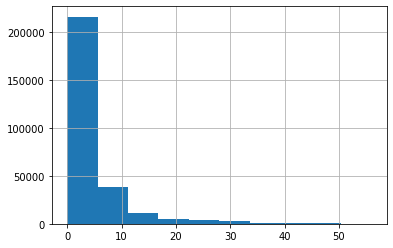

In [25]:
train_df['osm_healthcare_points_in_0.0075'].hist()

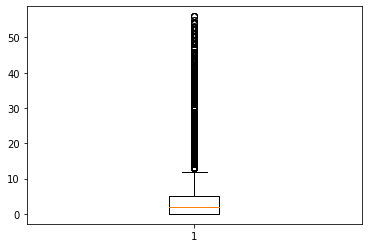

In [27]:
#оценка порядковой статистики и ее представление в виде "ящика с усами"
plt.boxplot(train_df['osm_healthcare_points_in_0.0075'])
plt.savefig('boxplot_healthcare_point_075.png')

In [29]:
#порядковые статистики мин, макс, медиана
print(train_df['osm_healthcare_points_in_0.0075'].min(),
      train_df['osm_healthcare_points_in_0.0075'].median(),
      train_df['osm_healthcare_points_in_0.0075'].max())

0 2.0 56


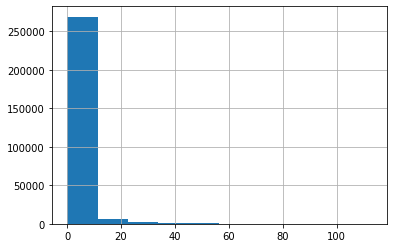

In [30]:
train_df['osm_hotels_points_in_0.0075'].hist()

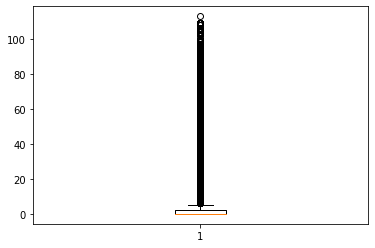

In [31]:
#оценка порядковой статистики и ее представление в виде "ящика с усами"
plt.boxplot(train_df['osm_hotels_points_in_0.0075'])
plt.savefig('boxplot_hotels.png')

In [33]:
#порядковые статистики мин, макс, медиана
print(train_df['osm_hotels_points_in_0.0075'].min(),
      train_df['osm_hotels_points_in_0.0075'].median(),
      train_df['osm_hotels_points_in_0.0075'].max())

0 0.0 113


In [32]:
from google.colab import files

files.download('boxplot_hotels.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>